<a href="INSERT_colab_R_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSERT_exercise_2_a

INSERT_install_packages

In [ ]:
#| label: install_packages_cell
install.packages(c("glmnet", "dplyr", "keras", "caret")) # may take a few minutes

INSERT_generating_data

In [8]:
#| label: data_generation

set.seed(509)  # for reproducibility

num_points = 100
num_additional_covs = 100

# the reader may find it interesting to play around with the noise amount
noise_amount = 0.3

# create matrix of features
X = matrix(rnorm(num_points * (num_additional_covs + 1)),
    nrow = num_points, ncol = num_additional_covs + 1)

y = sin(X[,1]) + rnorm(num_points, sd = noise_amount)

cat("X shape:", dim(X), "\n")
cat("y shape:", length(y))


X shape: 100 101 


y shape: 100

INSERT_vis_relationship

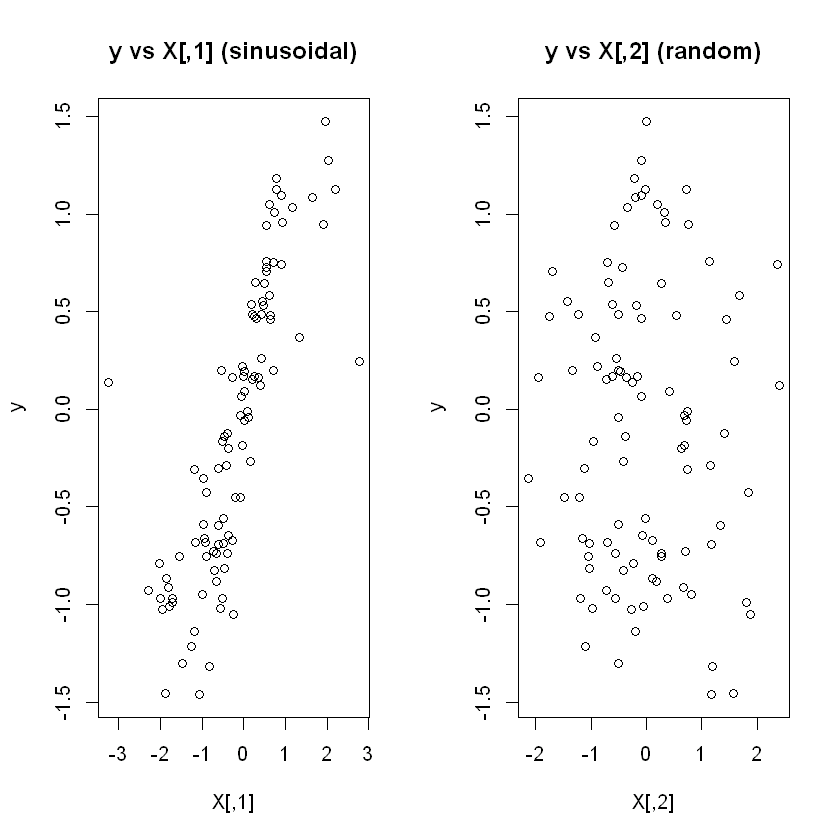

In [9]:
#| label: visualizing_relationships
par(mfrow = c(1, 2))

# Plot 1: y vs X[,1] (sinusoidal relationship with small noise)
plot(X[,1], y, main = "y vs X[,1] (sinusoidal)",
     xlab = "X[,1]", ylab = "y")

# Plot 2: y vs X[,2] (random)
plot(X[,2], y, main = "y vs X[,2] (random)",
     xlab = "X[,2]", ylab = "y")

par(mfrow = c(1, 1))

INSERT_exercise_2_b

INSERT_under_over_fitting_intro

INSERT_imports_and_splitting

In [10]:
#| label: imports_and_splitting
library(caret)
set.seed(509)

x_1 = X[, 1]

train_indices = createDataPartition(y, p = 0.8, list = FALSE)

X_train = x_1[train_indices]
X_test  = x_1[-train_indices]
y_train = y[train_indices]
y_test  = y[-train_indices]

train_df = data.frame(y = y_train, x = X_train)
test_df  = data.frame(x = X_test)

INSERT_underfitting_demo

INSERT_lin_reg_fit_and_eval

In [11]:
#| label: lin_reg_fit_and_eval
lin_reg <- lm(y ~ x, data = train_df)

y_train_pred = predict(lin_reg)
y_test_pred = predict(lin_reg, newdata = test_df)

train_mse_linear = mean((y_train - y_train_pred)^2)
test_mse_linear = mean((y_test - y_test_pred)^2)

percentage_diff_linear = (test_mse_linear - train_mse_linear) / train_mse_linear * 100

cat("Simple Linear Regression\n")
cat(sprintf("Train MSE: %.4f\n", train_mse_linear))
cat(sprintf("Test  MSE: %.4f\n", test_mse_linear))
cat(sprintf("Test error is higher by %.2f%%\n", percentage_diff_linear))

Simple Linear Regression
Train MSE: 0.1791
Test  MSE: 0.2415
Test error is higher by 34.79%


INSERT_lin_reg_interpretation

INSERT_lin_reg_visual_inspection

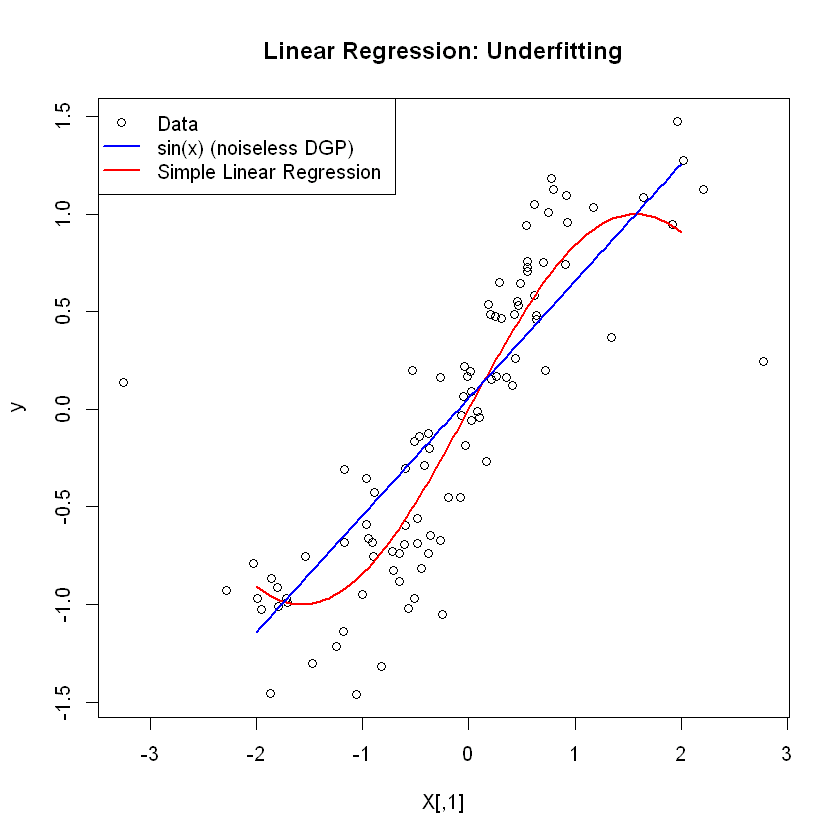

In [12]:
#| label: lin_reg_visual_inspection
plot(x_1, y, main = "Linear Regression: Underfitting", xlab = "X[,1]", ylab = "y")

# noiseless DGP (Data Generating Process)
x_vals = seq(-2, 2, length.out = 100)
y_vals = sin(x_vals)
lines(x_vals, y_vals, col = "red", lwd = 2)

# simple linear regression prediction
y_pred = predict(lin_reg, newdata = data.frame(x = x_vals))
lines(x_vals, y_pred, col = "blue", lwd = 2)

legend("topleft",
    legend = c("Data", "sin(x) (noiseless DGP)", "Simple Linear Regression"),
    col = c("black", "blue", "red"),
    lty = c(NA, 1, 1),
    pch = c(1, NA, NA),
    lwd = c(NA, 2, 2))

INSERT_lin_reg_plot_interpretation

INSERT_overfitting_demo

INSERT_poly_reg_fit_and_eval

In [17]:
#| label: poly_reg_fit_and_eval
poly_degree = 50

# Creating our design matrix for the polynomial regression
X_train_poly = poly(X_train, degree = poly_degree, raw = TRUE)
X_test_poly = predict(X_train_poly, X_test)

# don't get confused by the model name, we are fitting it on the transformed data)
poly_reg = lm(y_train ~ X_train_poly)

y_train_pred = predict(poly_reg)
y_test_pred = predict(poly_reg, newdata = data.frame(X_train_poly = I(X_test_poly)))

train_mse_poly = mean((y_train - y_train_pred)^2)
test_mse_poly = mean((y_test - y_test_pred)^2)

percentage_diff_poly = (test_mse_poly - train_mse_poly) / train_mse_poly * 100

# Create comparison table
cat("Model                             | Train MSE | Test MSE    | Percentage Difference\n")
cat("----------------------------------+-----------+-------------+----------------------\n")
cat(sprintf("Simple Linear Regression          | %.4f    | %.4f      | %.2f%%\n", 
            train_mse_linear, test_mse_linear, percentage_diff_linear))
cat(sprintf("Polynomial Regression (degree=50) | %.4f    | %.4f | %.2f%%\n", 
            train_mse_poly, test_mse_poly, percentage_diff_poly))

Warning message in predict.lm(poly_reg, newdata = data.frame(X_train_poly = I(X_test_poly))):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


Model                             | Train MSE | Test MSE    | Percentage Difference
----------------------------------+-----------+-------------+----------------------
Simple Linear Regression          | 0.1791    | 0.2415      | 34.79%
Polynomial Regression (degree=50) | 0.0685    | 1799797.4732 | 2626076709.95%


INSERT_poly_reg_interpretation

INSERT_poly_reg_visual_inspection

Warning message in predict.lm(poly_reg, newdata = data.frame(X_train_poly = I(x_vals_poly))):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


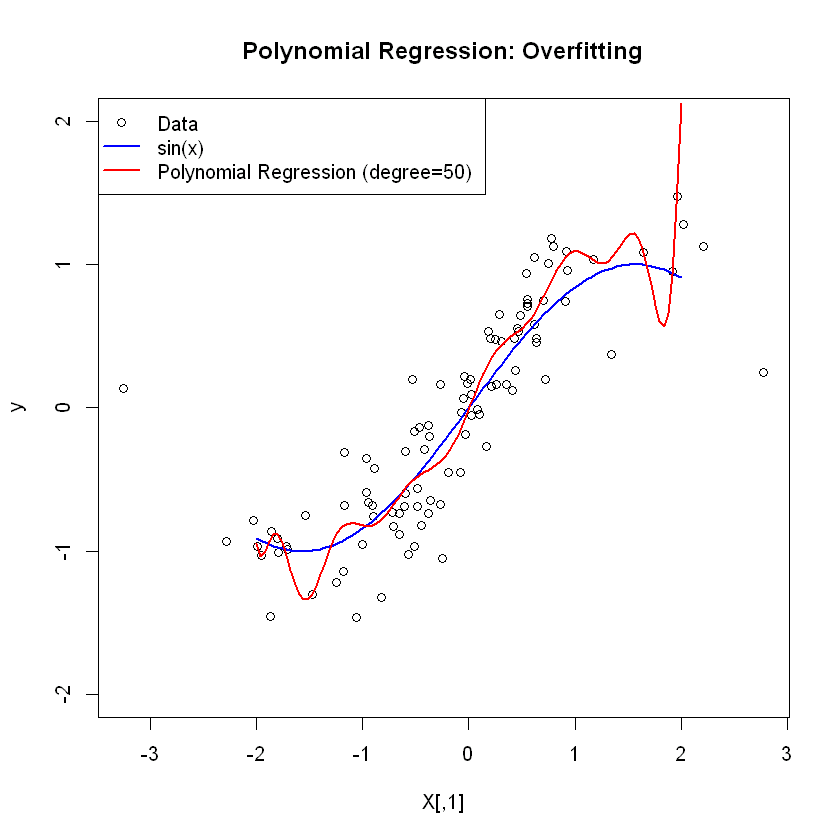

In [18]:
#| label: poly_reg_visual_inspection
plot(x_1, y, main = "Polynomial Regression: Overfitting", xlab = "X[,1]", ylab = "y", ylim = c(-2, 2))

# noiseless DGP
x_vals = seq(-2, 2, length.out = 100)
y_vals = sin(x_vals)
lines(x_vals, y_vals, col = "blue", lwd = 2)

# polynomial regression prediction
x_vals_poly = poly(x_vals, degree = poly_degree, raw = TRUE)
y_pred = predict(poly_reg, newdata = data.frame(X_train_poly = I(x_vals_poly)))

lines(x_vals, y_pred, col = "red", lwd = 2)

legend("topleft", legend = c("Data", "sin(x)",
    paste0("Polynomial Regression (degree=", poly_degree, ")")),
    col = c("black", "blue", "red"), lty = c(NA, 1, 1), pch = c(1, NA, NA), lwd = c(NA, 2, 2))

INSERT_poly_reg_plot_interpretation

INSERT_regularization_demo

INSERT_regularization_helper_function_R

In [ ]:
#| label: regularization_helper_function
library(glmnet)

INSERT_l1_lasso_regularization

Loading required package: Matrix

Loaded glmnet 4.1-10



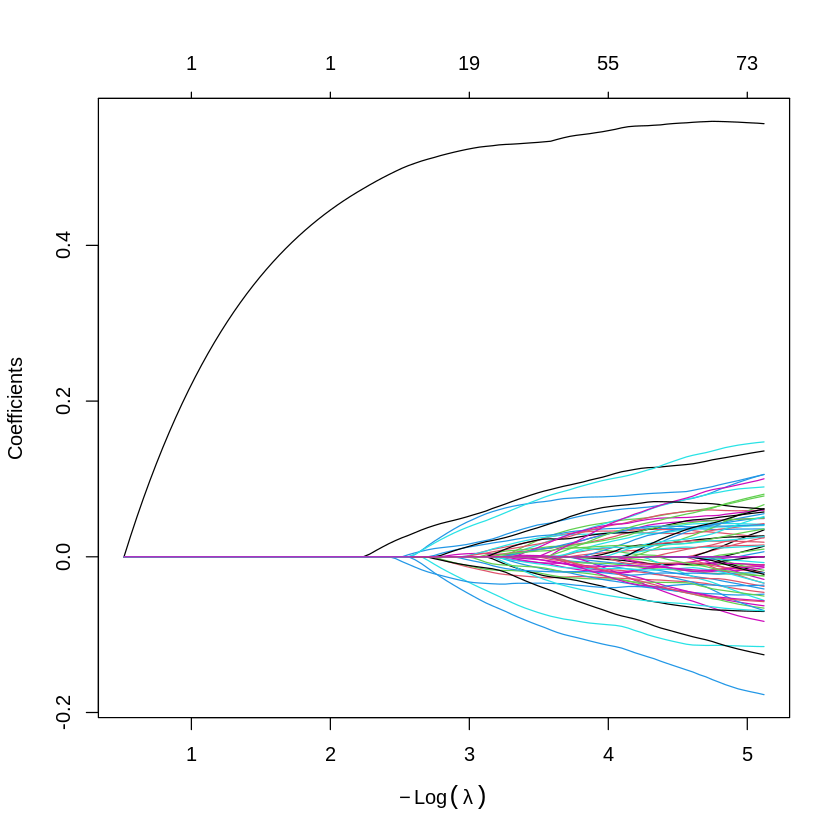

In [ ]:
#| label: l1_lasso_plot
plot(glmnet(X, y, alpha=1), xvar = "lambda")

INSERT_l2_ridge_regularization

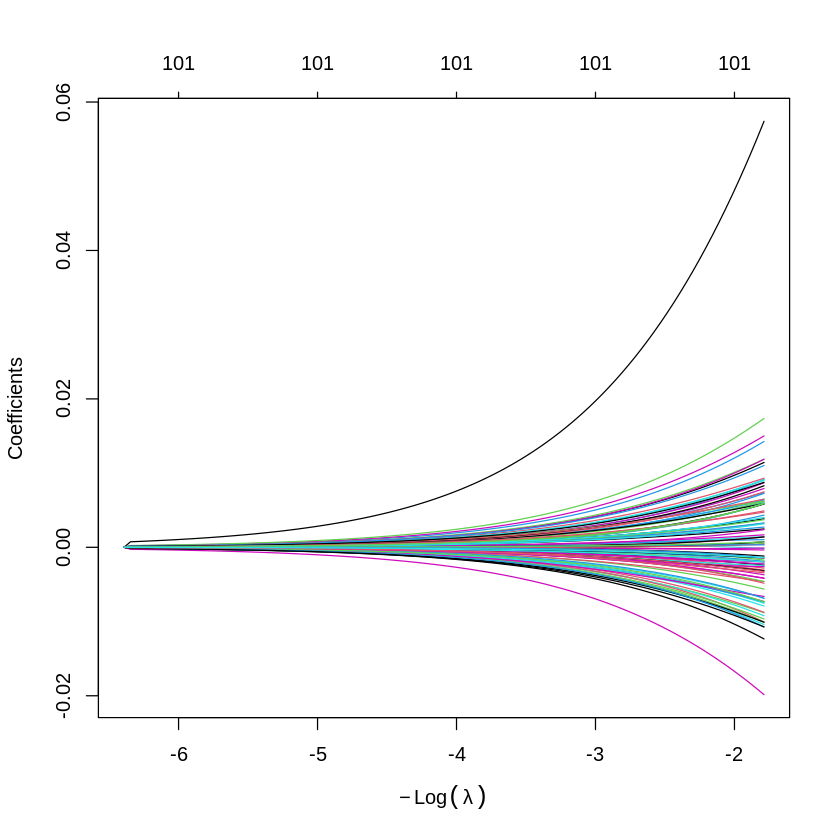

In [9]:
#| label: l2_ridge_plot
plot(glmnet(X, y, alpha = 0), xvar = "lambda")

INSERT_elastic_net_regularization

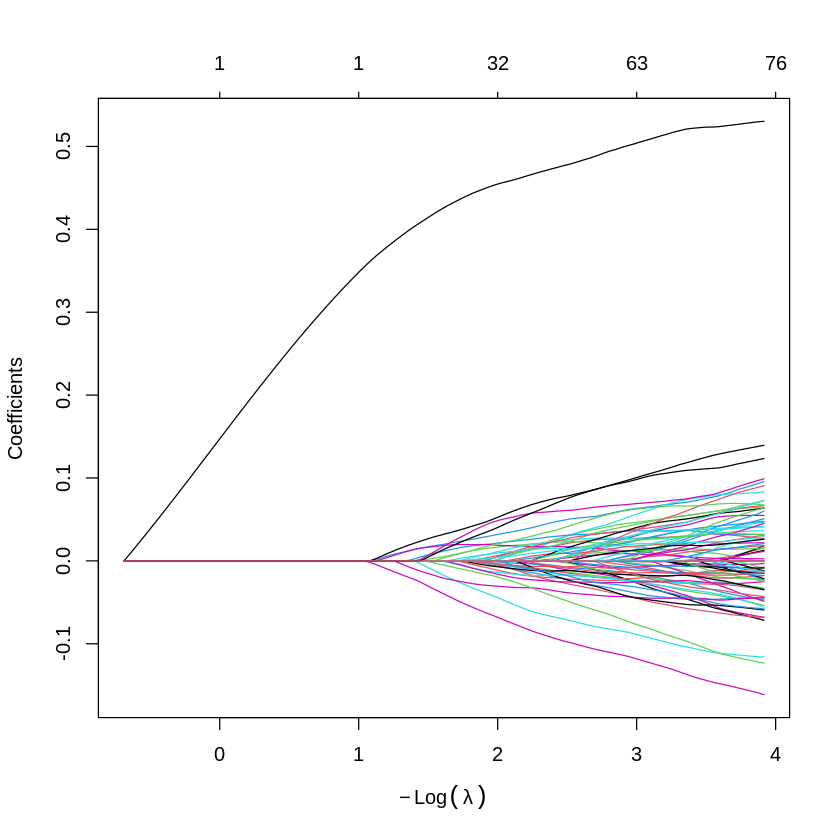

In [10]:
#| label: elastic_net_plot
plot(glmnet(X, y, alpha = 0.3), xvar = "lambda")


INSERT_regularization_comparison_note

INSERT_underdetermined_problem

In [11]:
#| label: check_x_shape_determinant
cat("X shape:", dim(X), "\n")

# We have more covariates than samples, but practically this does not imply
# that we have a zero determinant
cat("Determinant of X^T X:", det(t(X) %*% X), "\n")

X shape: 100 101 
Determinant of X^T X: -4.858666e+144 


In [12]:
#| label: underdetermined_fewer_samples

# Let's select even fewer samples to demonstrate the underdetermined problem
X_head = X[1:10, ]
y_head = y[1:10]

cat("Determinant of X_head^T X_head:", det(t(X_head) %*% X_head), "\n")

Determinant of X_head^T X_head: 0 


INSERT_calc_xt_x_determinant

In [13]:
solve(t(X_head) %*% X_head)

ERROR: Error in solve.default(t(X_head) %*% X_head): system is computationally singular: reciprocal condition number = 2.18675e-20


INSERT_inverse_existence_explanation_R

INSERT_bias_variance_tradeoff

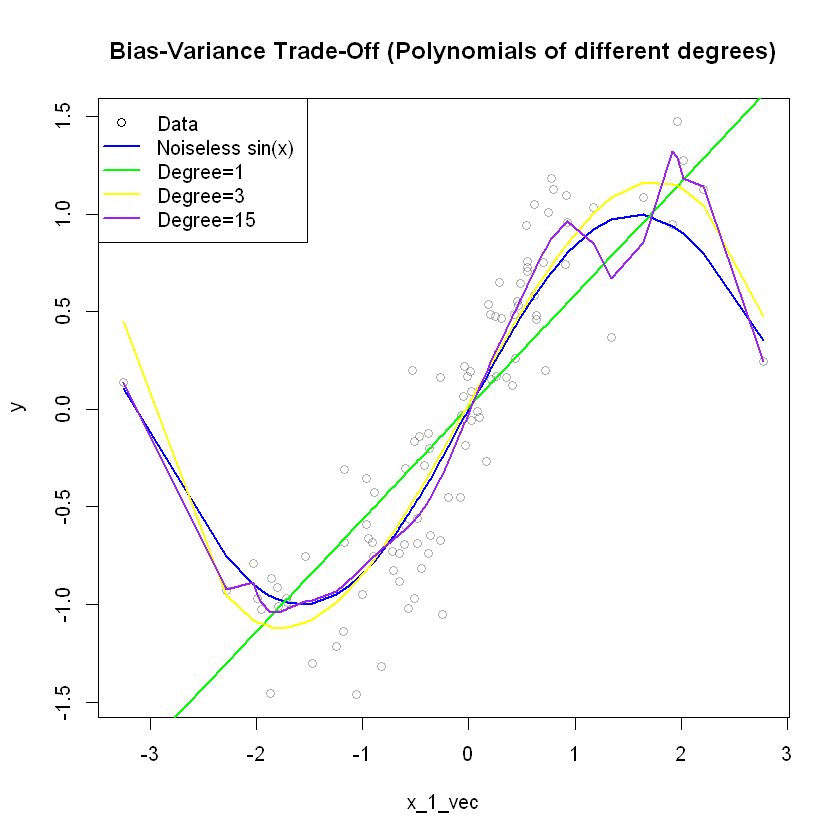

In [19]:
#| label: bias_variance_visualization

x_1_vec = X[, 1]
sorted_x_1 = sort(x_1_vec)

degrees = c(1, 3, 15)
colors = c("green", "yellow", "purple")

plot(x_1_vec, y, col = rgb(0, 0, 0, 0.3),
    main = "Bias-Variance Trade-Off (Polynomials of different degrees)")
lines(sorted_x_1, sin(sorted_x_1), col = "blue", lwd = 2)

for (i in 1:length(degrees)) {
    deg = degrees[i]
    col = colors[i]

    X_poly_tmp = poly(X[, 1], degree = deg, raw = TRUE)

    model_tmp = lm(y ~ X_poly_tmp)
    sorted_x1_poly_tmp = predict(poly(X[, 1], degree = deg, raw = TRUE), sorted_x_1)

    Y_poly_tmp = predict(model_tmp, newdata = data.frame(X_poly_tmp = I(sorted_x1_poly_tmp)))
    lines(sorted_x_1, Y_poly_tmp, col = col, lwd = 2)
}

legend("topleft", legend = c("Data", "Noiseless sin(x)", paste0("Degree=", degrees)),
       col = c("black", "blue", colors), lty = c(NA, 1, 1, 1, 1),
       pch = c(1, NA, NA, NA, NA), lwd = c(NA, 2, 2, 2, 2))

INSERT_bias_variance_interpretation

INSERT_early_stopping_neural_network

In [ ]:
#| early_stopping_package_install_R
# You may first need to install keras3 (this may take a couple of minutes)
install.packages("keras3")
library(keras3)
install_keras()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Virtual environment 'r-keras' removed.
Using Python: /root/.pyenv/versions/3.10.13/bin/python3.10
Creating virtual environment 'r-keras' ... 


+ /root/.pyenv/versions/3.10.13/bin/python3.10 -m venv /root/.virtualenvs/r-keras



Done!
Installing packages: pip, wheel, setuptools


+ /root/.virtualenvs/r-keras/bin/python -m pip install --upgrade pip wheel setuptools



Virtual environment 'r-keras' successfully created.
Using virtual environment 'r-keras' ...


+ /root/.virtualenvs/r-keras/bin/python -m pip install --upgrade --no-user scipy pandas Pillow pydot ipython tensorflow_datasets 'numpy<2'



Using virtual environment 'r-keras' ...


+ /root/.virtualenvs/r-keras/bin/python -m pip install --upgrade --no-user tensorflow-cpu 'jax[cpu]'



Using virtual environment 'r-keras' ...


+ /root/.virtualenvs/r-keras/bin/python -m pip install --upgrade --no-user 'keras==3.*'

Finished installing Keras!




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




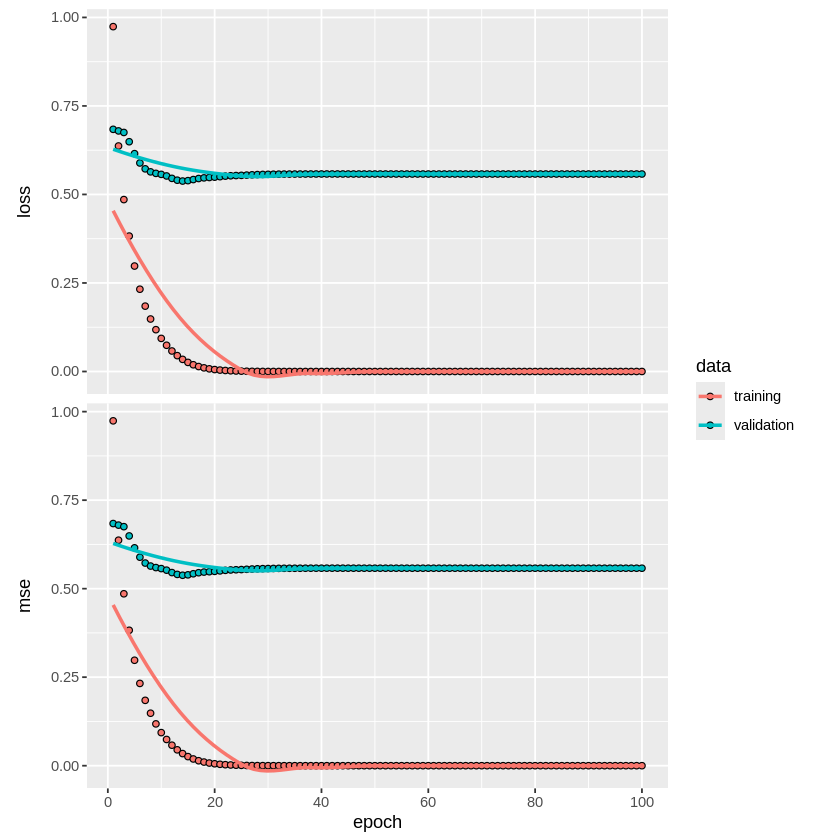

In [ ]:
#| label: neural_network_early_stopping
library(dplyr)
library(keras3) # TensorFlow is used for simplicity, in practice we may often prefer torch


keras$utils$set_random_seed(509L)

neural_network <- keras_model_sequential() %>%
  layer_dense(units = 50, activation = "relu", input_shape = ncol(X)) %>%
  layer_dense(units = 50, activation = "relu") %>%
  layer_dense(units = 1,  activation = "linear")

neural_network %>% compile(
  optimizer = "adam",
  loss      = "mse",
  metrics   = "mse"
)

history_minibatches <- fit(
  object           = neural_network,
  x                = X,
  y                = y,
  batch_size       = 24,
  epochs           = 100,
  validation_split = 0.2,
  verbose          = 0,      # set this to 1 to to see training logs
  view_metrics     = FALSE   # set this to TRUE to get a dynamic graphic output in RStudio
)

plot(history_minibatches)


INSERT_no_early_stopping_interpretation

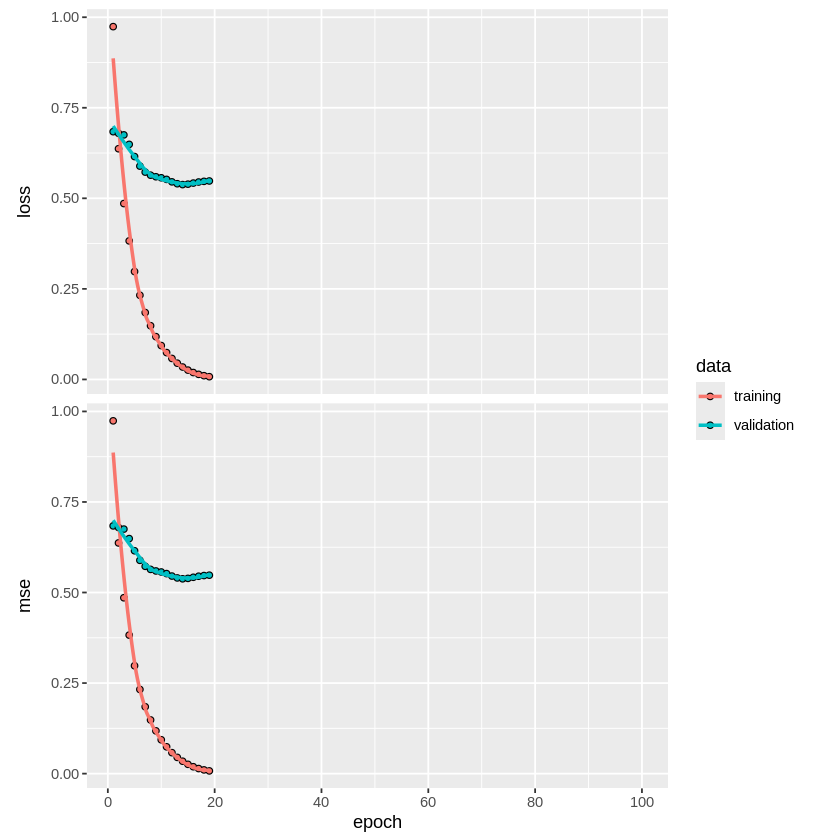

In [ ]:
#| label: early_stopping
library(dplyr)
library(keras3) # Keras is used for simplicity, in practice we may often prefer torch

keras$utils$set_random_seed(509L)

neural_network <- keras_model_sequential() %>%
  layer_dense(units = 50, activation = "relu", input_shape = ncol(X)) %>%
  layer_dense(units = 50, activation = "relu") %>%
  layer_dense(units = 1,  activation = "linear")

neural_network %>% compile(
  optimizer = "adam",
  loss      = "mse",
  metrics   = "mse"
)

history_minibatches <- fit(
  object           = neural_network,
  x                = X,
  y                = y,
  batch_size       = 24,
  epochs           = 100,
  validation_split = 0.2,
  callbacks        = list(callback_early_stopping(patience = 5)), # <- NEW LINE
  verbose          = 0,        # set this to 1 to to see training logs
  view_metrics     = FALSE     # set this to TRUE to get a dynamic graphic output in RStudio
)

plot(history_minibatches)

INSERT_early_stopping_interpretation